There are two datasets, namely transaction data and customer data. The aim is to develop a model that can be used to determine whether a customer commits fraud based on customer profiles and transaction data.

In the world of payments, fraudulent transactions are illegal or illegal transactions. For example is a credit card transaction that is not known by the card owner. Those who carry out fraudulent transactions are usually called fraudsters, and use card information to buy goods/services for their own benefit.

I will analyze the pattern of transaction behavior through various data such as card numbers, emails, telephone numbers, and so on. And use machine learning to predict fraud

#1. IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy import stats
import math
import scipy.stats as ss
%matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from collections import Counter

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score

#2. DATA LOADING & CLEANING

###2.1 LOADING DATA

In [ ]:
df1 = pd.read_csv('customer_data.csv')
df1.head(20)

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True
5,5,robinsoncynthia@dunn.com,+65(5)8997489788,hbww39m1wenbq4ymjhsx,43.166.163.164,"65233 Hutchinson Mountains\nMartinezside, OR 7...",1,1,2,True
6,6,samuel15@saunders-rhodes.com,05045239487,up7afvce5v0omniqlevq,33.67.35.30,"3960 Emily Fort\nStaceytown, AR 21817-3325",2,1,2,True
7,7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",6,5,2,True
8,8,jameslandry@rodriguez.com,1-885-168-1310x338,yz4l2bgbvzra5eb5qcan,c899:ff67:6864:4365:def3:3023:655f:5181,USNS Price\nFPO AE 14661,5,2,1,False
9,9,ubranch@rivera-parker.info,(772)964-8162x6310,6mpx027neyz6sh04n3ue,86.16.65.228,"6974 Robertson Common Apt. 902\nPort Juanside,...",0,0,1,True


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


In [ ]:
# check for missing values
df1.isnull().sum()

Unnamed: 0                0
customerEmail             0
customerPhone             0
customerDevice            0
customerIPAddress         0
customerBillingAddress    0
No_Transactions           0
No_Orders                 0
No_Payments               0
Fraud                     0
dtype: int64

In [ ]:
df2= pd.read_csv('transaction_data.csv')
df2.head(20)

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled
5,5,andersonwilliam@yahoo.com,q3lyvbza,yk34y2,8pneoi03z,0,card,JCB 16 digit,33,0,failed
6,6,andersonwilliam@yahoo.com,3alf9irw,28v6b0,8pneoi03z,0,card,JCB 16 digit,24,1,fulfilled
7,7,andersonwilliam@yahoo.com,69w9wymx,28v6b0,8pneoi03z,0,card,JCB 16 digit,24,0,fulfilled
8,8,andersonwilliam@yahoo.com,pegqc4ud,itnk8y,dluy3jka0,0,card,Discover,25,1,fulfilled
9,9,andersonwilliam@yahoo.com,uo3slwh7,itnk8y,8pneoi03z,0,card,JCB 16 digit,25,0,fulfilled


In [ ]:
# check for missing values
df2.isnull().sum()

Unnamed: 0                          0
customerEmail                       0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
dtype: int64

###2.2 MERGE CUSTOMER DATA & TRANSACTION DATA

In [ ]:
df = pd.merge(df1,df2, on = 'customerEmail', how='inner')

In [ ]:
df

,Unnamed: 0_x,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Unnamed: 0_y,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,0,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,1,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,2,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,3,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,4,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,618,7yilsi1o,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,1,fulfilled
815,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,619,c82k5bcv,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,0,fulfilled
816,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,620,wmh52bns,1bubxa,3zmkegkb8,0,paypal,JCB 15 digit,25,1,fulfilled
817,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,621,xdw33hfp,p0gdbf,3zmkegkb8,0,paypal,JCB 15 digit,19,0,fulfilled


###2.3 DROP UNNECESARRY COLUMN

I decided to drop some features because the information contained in these features is not strong enough, easy to modify so it doesn't have a behavior pattern

In [ ]:
df.drop(columns=["Unnamed: 0_x", "customerEmail", "customerPhone", "customerDevice", "customerIPAddress", "customerBillingAddress", "transactionId", "orderId", "paymentMethodId", "Unnamed: 0_y"],axis=1,inplace=True)
df.head(2)

,No_Transactions,No_Orders,No_Payments,Fraud,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,2,2,1,False,1,card,JCB 16 digit,18,0,pending
1,2,2,1,False,1,card,JCB 16 digit,26,0,fulfilled


###2.4 CHECKING MISSING VALUE

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 818
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   No_Transactions                   819 non-null    int64 
 1   No_Orders                         819 non-null    int64 
 2   No_Payments                       819 non-null    int64 
 3   Fraud                             819 non-null    bool  
 4   paymentMethodRegistrationFailure  819 non-null    int64 
 5   paymentMethodType                 819 non-null    object
 6   paymentMethodProvider             819 non-null    object
 7   transactionAmount                 819 non-null    int64 
 8   transactionFailed                 819 non-null    int64 
 9   orderState                        819 non-null    object
dtypes: bool(1), int64(6), object(3)
memory usage: 64.8+ KB


In [ ]:
# check for missing values
df.isnull().sum()

No_Transactions                     0
No_Orders                           0
No_Payments                         0
Fraud                               0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
dtype: int64

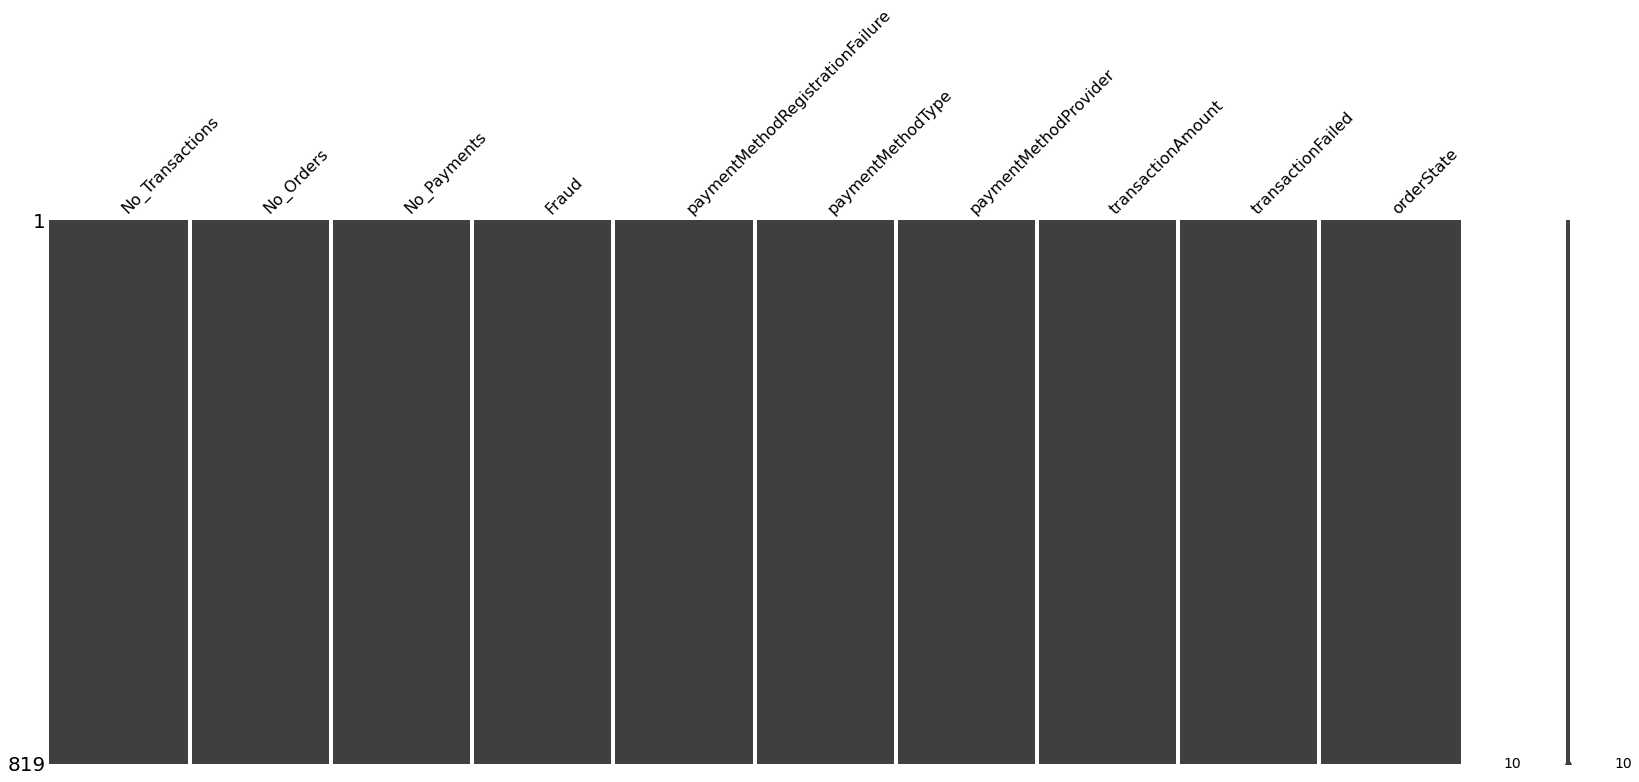

In [ ]:
import missingno as msno

msno.matrix(df)  # just to visualize. no missing value.

###2.5 CHANGE THE TYPE OF DATA

In [ ]:
df['Fraud'] = df['Fraud'].replace(" ", 0).astype('object')

In [ ]:
df['paymentMethodRegistrationFailure'] = df['paymentMethodRegistrationFailure'].astype('object')

In [ ]:
df['transactionFailed'] = df['transactionFailed'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 818
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   No_Transactions                   819 non-null    int64 
 1   No_Orders                         819 non-null    int64 
 2   No_Payments                       819 non-null    int64 
 3   Fraud                             819 non-null    object
 4   paymentMethodRegistrationFailure  819 non-null    object
 5   paymentMethodType                 819 non-null    object
 6   paymentMethodProvider             819 non-null    object
 7   transactionAmount                 819 non-null    int64 
 8   transactionFailed                 819 non-null    object
 9   orderState                        819 non-null    object
dtypes: int64(4), object(6)
memory usage: 70.4+ KB


#3. EDA

In [ ]:
print("Total categories in the feature Fraud:\n", df["Fraud"].value_counts(), "\n")
print("Total categories in the feature paymentMethodRegistrationFailure:\n", df["paymentMethodRegistrationFailure"].value_counts(), "\n")
print("Total categories in the feature paymentMethodType:\n", df["paymentMethodType"].value_counts(), "\n")
print("Total categories in the feature paymentMethodProvider:\n", df["paymentMethodProvider"].value_counts(), "\n")
print("Total categories in the feature orderState:\n", df["orderState"].value_counts())

Total categories in the feature Fraud:
 True     453
False    366
Name: Fraud, dtype: int64 

Total categories in the feature paymentMethodRegistrationFailure:
 0    737
1     82
Name: paymentMethodRegistrationFailure, dtype: int64 

Total categories in the feature paymentMethodType:
 card         647
bitcoin       68
paypal        55
apple pay     49
Name: paymentMethodType, dtype: int64 

Total categories in the feature paymentMethodProvider:
 JCB 16 digit                   167
VISA 16 digit                  166
Maestro                        104
Voyager                         82
American Express                66
VISA 13 digit                   58
Diners Club / Carte Blanche     58
JCB 15 digit                    45
Discover                        41
Mastercard                      32
Name: paymentMethodProvider, dtype: int64 

Total categories in the feature orderState:
 fulfilled    691
failed        84
pending       44
Name: orderState, dtype: int64


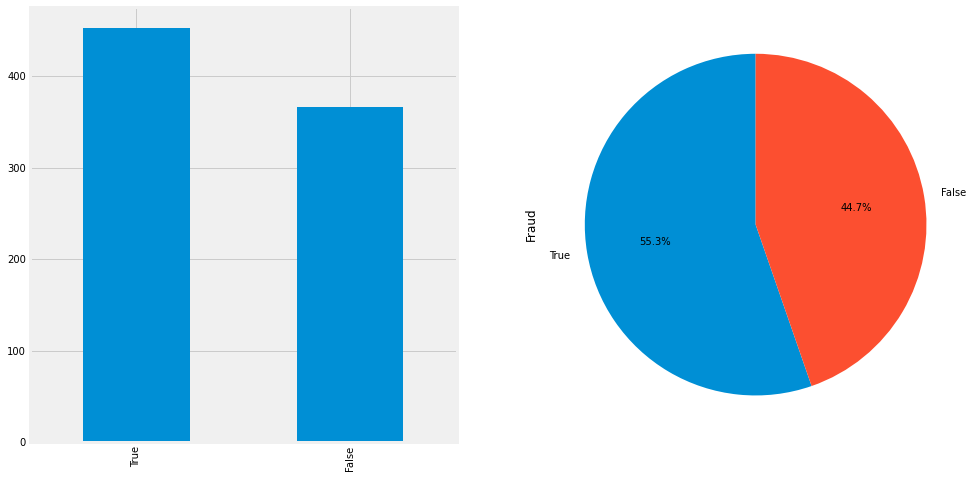

In [ ]:
'''
Visualisasi variabel target (Fraud)

'''

fig, axs = plt.subplots(ncols=2, figsize=(15,8))
df['Fraud'].value_counts().plot(kind='bar', ax=axs[0])
df['Fraud'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

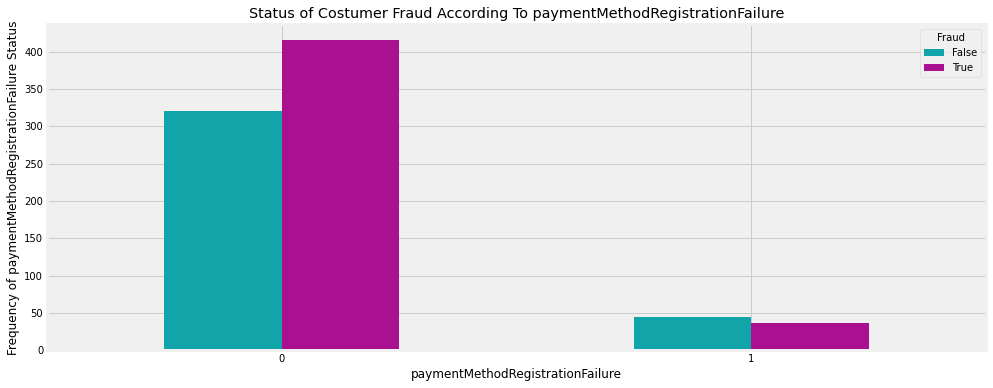

In [ ]:
pd.crosstab(df.paymentMethodRegistrationFailure, df.Fraud).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Fraud According To paymentMethodRegistrationFailure')
plt.xlabel('paymentMethodRegistrationFailure')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of paymentMethodRegistrationFailure Status')
plt.show()

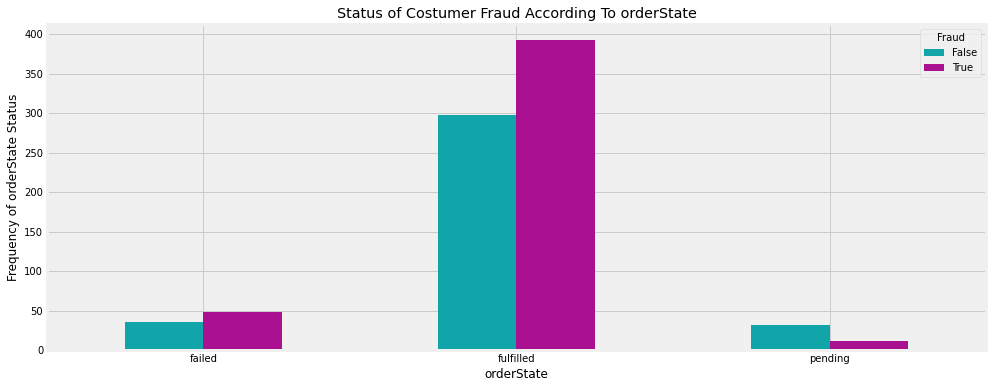

In [ ]:
pd.crosstab(df.orderState, df.Fraud).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Fraud According To orderState')
plt.xlabel('orderState')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of orderState Status')
plt.show()

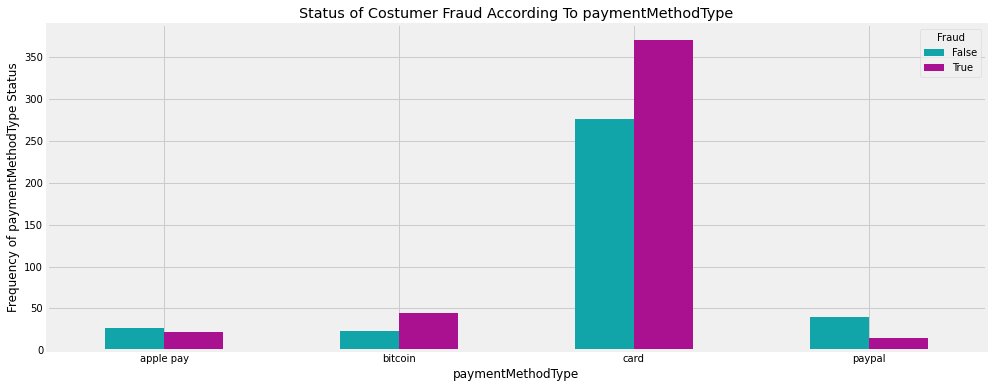

In [ ]:
pd.crosstab(df.paymentMethodType, df.Fraud).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Fraud According To paymentMethodType')
plt.xlabel('paymentMethodType')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of paymentMethodType Status')
plt.show()

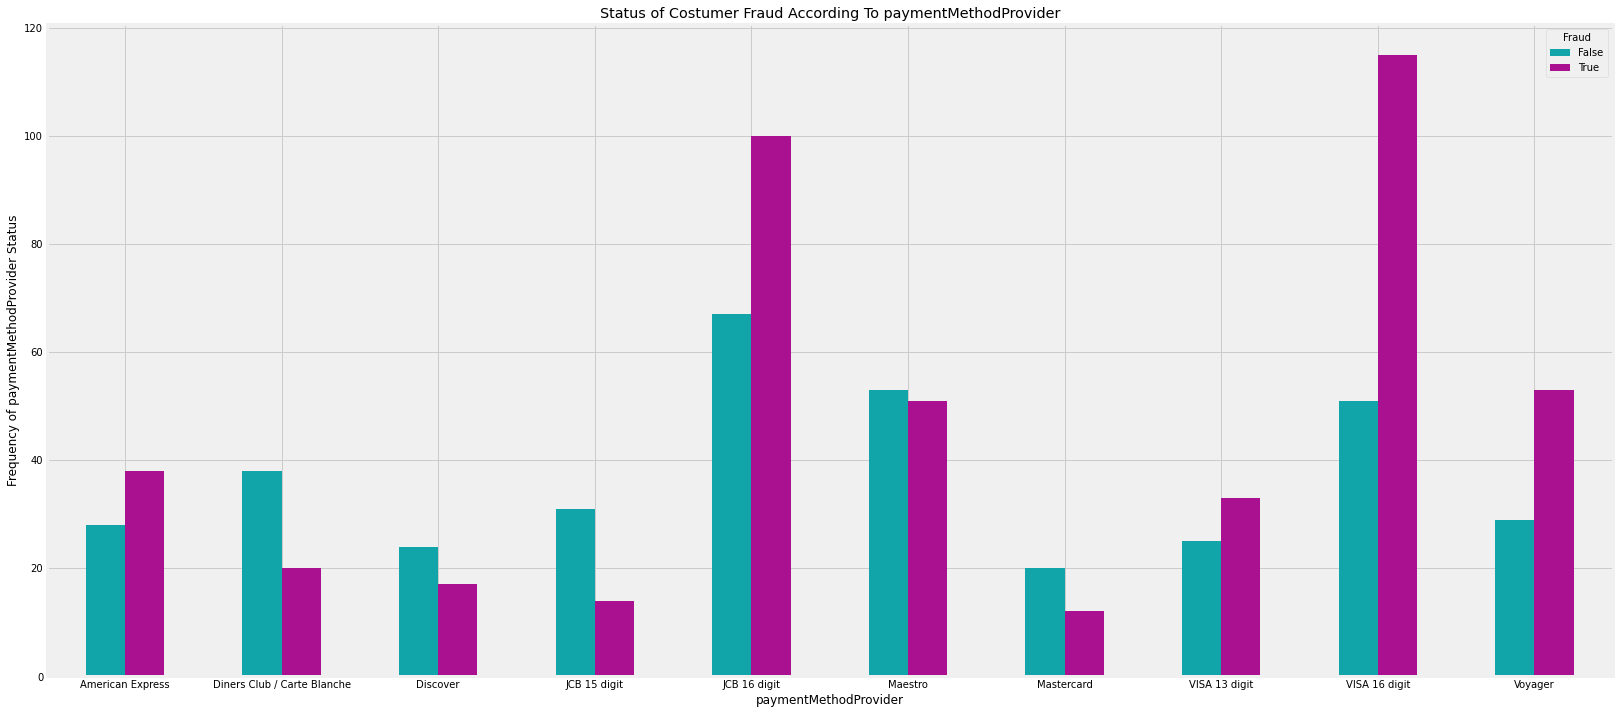

In [ ]:
pd.crosstab(df.paymentMethodProvider, df.Fraud).plot(kind="bar",figsize=(25,12),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Fraud According To paymentMethodProvider')
plt.xlabel('paymentMethodProvider')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of paymentMethodProvider Status')
plt.show()

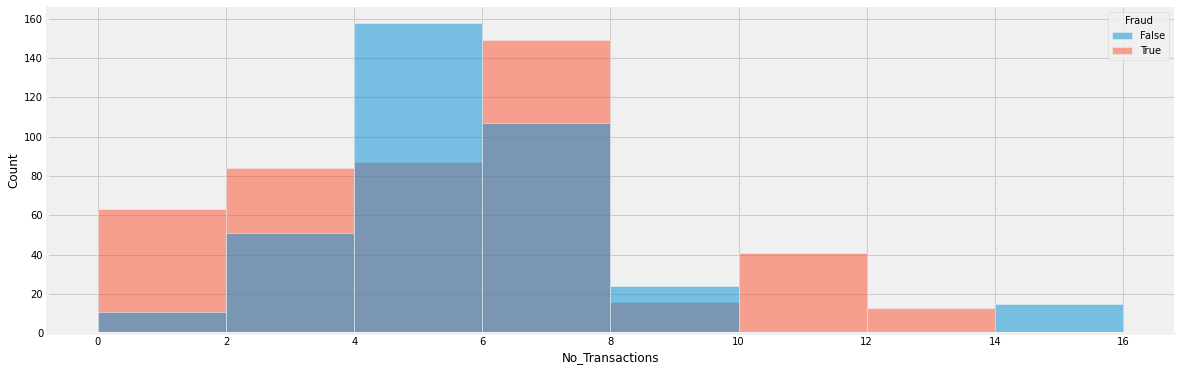

In [ ]:
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="No_Transactions", bins=bins, hue="Fraud");
sns.despine(top=True, right=True)

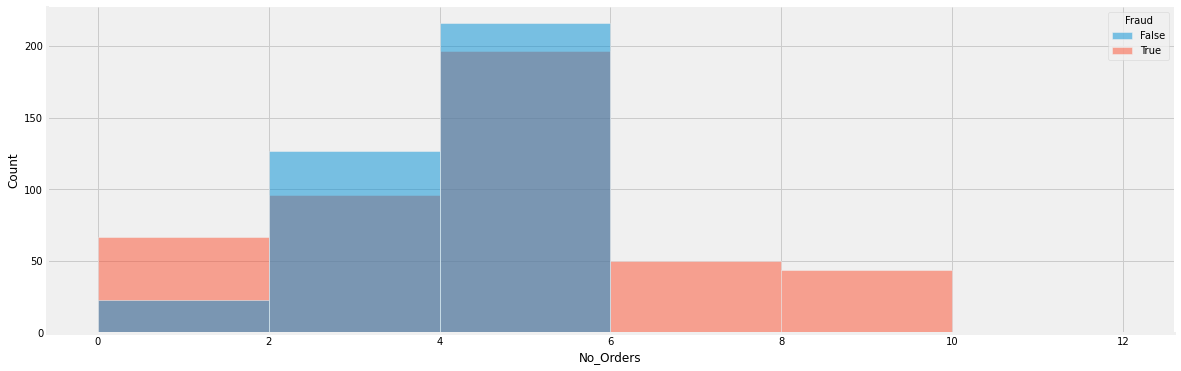

In [ ]:
bins = [0, 2, 4, 6, 8, 10, 12]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="No_Orders", bins=bins, hue="Fraud");
sns.despine(top=True, right=True)

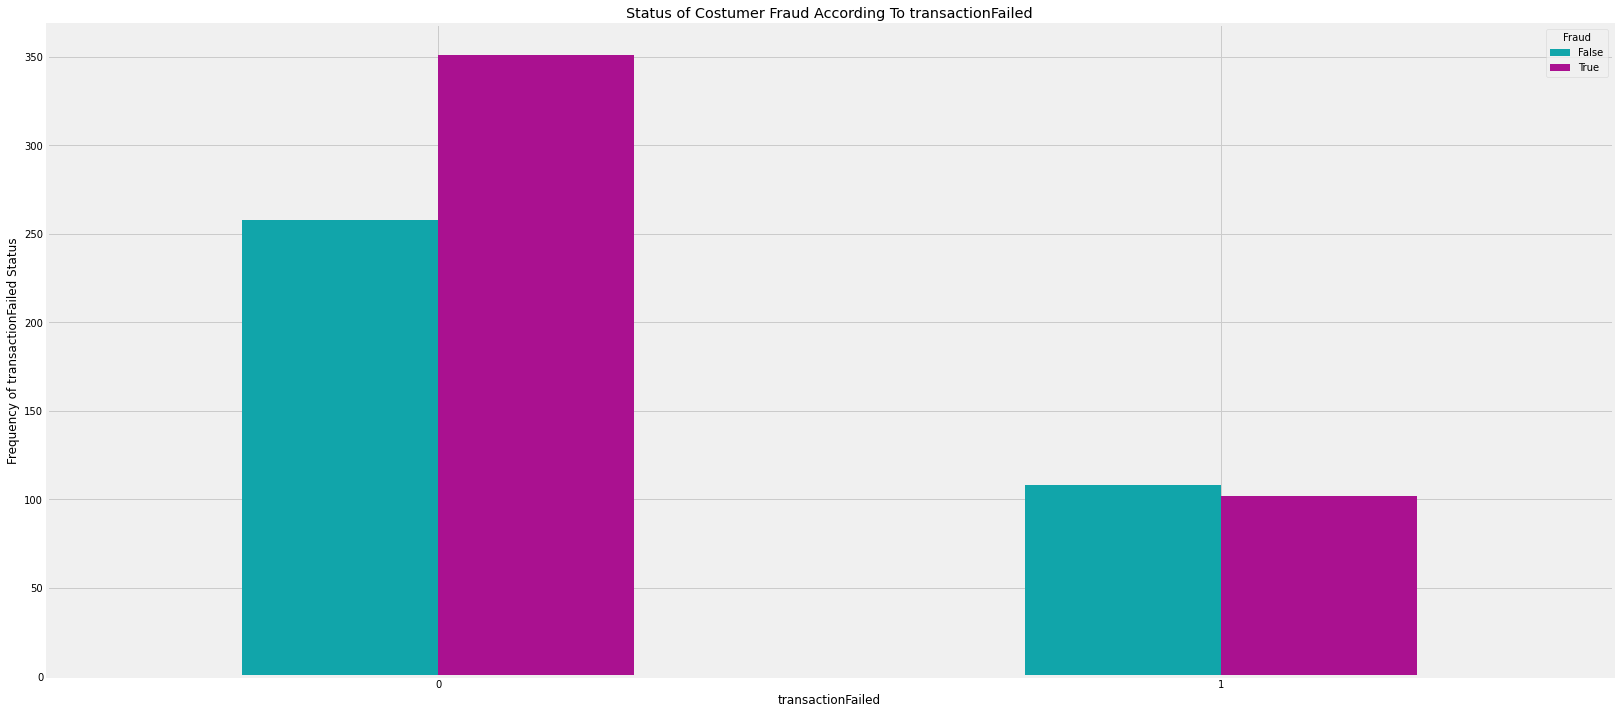

In [ ]:
pd.crosstab(df.transactionFailed, df.Fraud).plot(kind="bar",figsize=(25,12),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Fraud According To transactionFailed')
plt.xlabel('transactionFailed')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of transactionFailed Status')
plt.show()

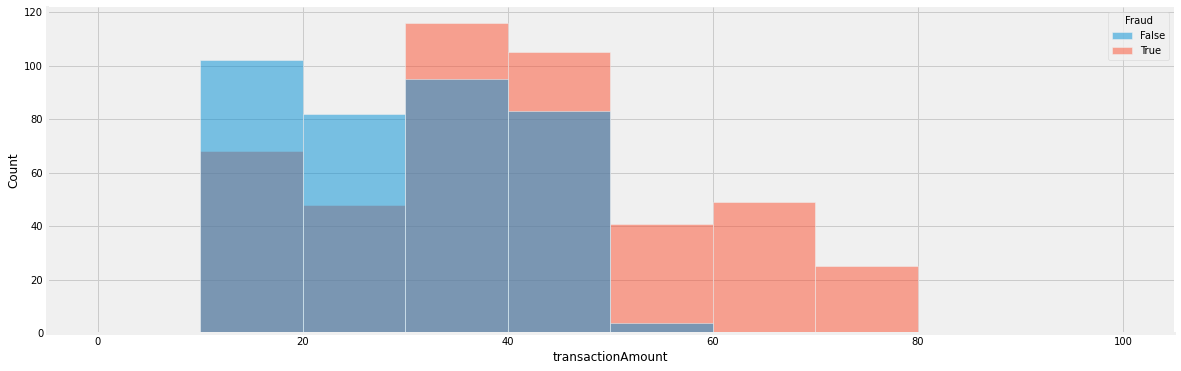

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="transactionAmount", bins=bins, hue="Fraud");
sns.despine(top=True, right=True)

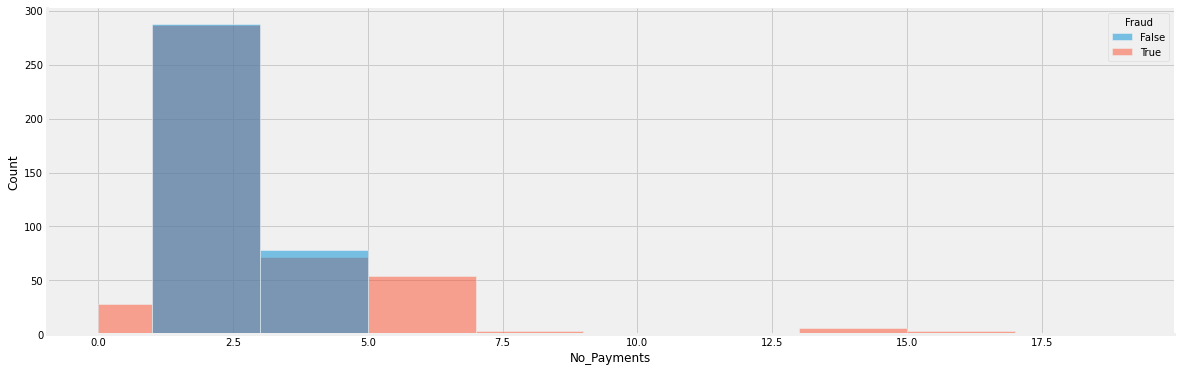

In [ ]:
bins = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="No_Payments", bins=bins, hue="Fraud");
sns.despine(top=True, right=True)

#4. PREPROCESSING DATA

###4.1 SPLIT DATASET

In [ ]:
X = df.drop('Fraud', axis = 1)
y = df.Fraud

In [ ]:
y=y.astype('int')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=28, stratify = y)

In [ ]:
X_train.shape, X_test.shape

((655, 9), (164, 9))

###4.2 HANDLING OUTLIER

####X_TRAIN

In [ ]:
'''
Menampilkan presentasi outlier pada X_train

'''
num_train = X_train._get_numeric_data() 
for k, v in num_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column No_Transactions outliers = 17.71%
Column No_Orders outliers = 12.37%
Column No_Payments outliers = 5.19%
Column transactionAmount outliers = 0.15%


In [ ]:
num_train = X_train._get_numeric_data()
num_train.isnull().sum()

No_Transactions      0
No_Orders            0
No_Payments          0
transactionAmount    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

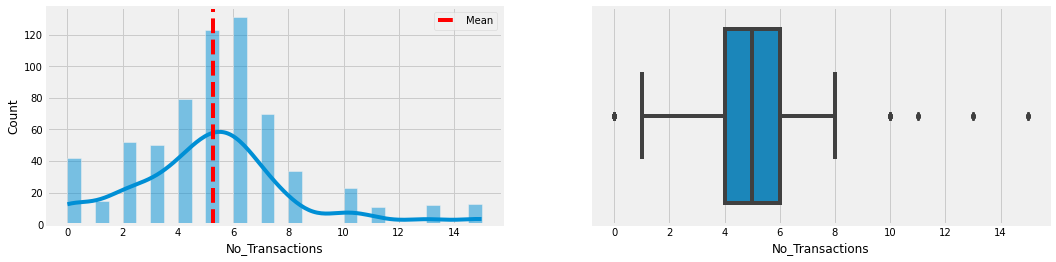

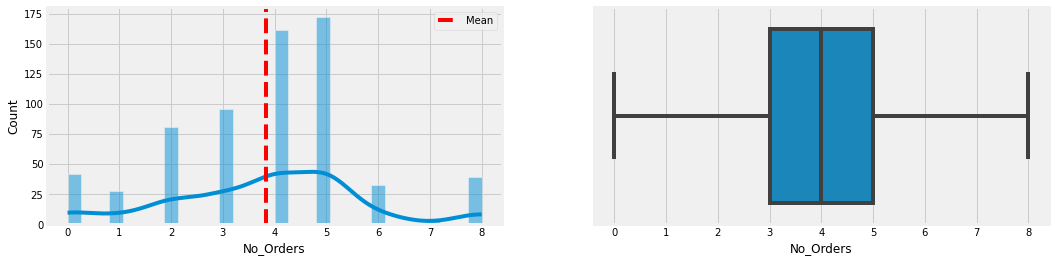

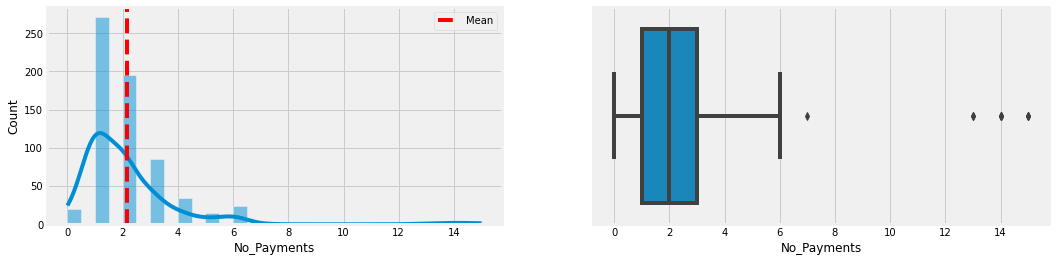

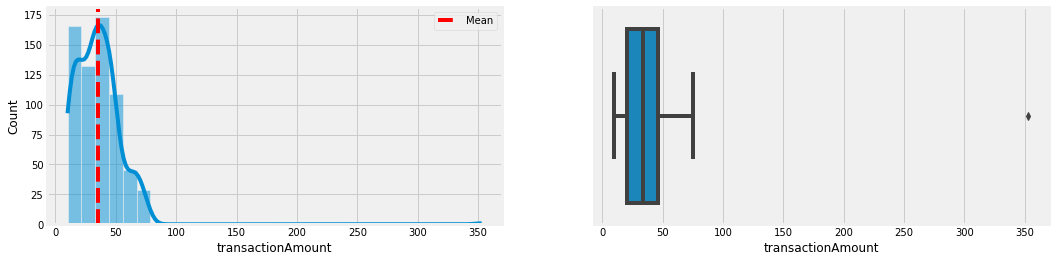

In [ ]:
for i in num_train:
  fig, axs = plt.subplots(1,2,figsize=(16, 4))
  sns.histplot(num_train[i], bins = 30, kde=True, ax = axs[0])
  sns.boxplot(num_train[i], ax = axs[1])

  axs[0].axvline(num_train[i].mean(), color='red', linestyle='dashed', label = 'Mean')
  axs[0].legend()

1. Terlihat bahwa terdapat outlier di total transaksi (no_transaction) di angka <1 dan >8
2. Terlihat bahwa terdapat outlier di jumlah payments (no_payment) di angka >6
3. Terlihat bahwa terdapat outlier di jumlah transaksi (transactionAmount) di angka 350

**Saya memutuskan untuk mempertahankan outlier yang ada karena saya memiliki kecurigaan bahwa angka outlier ini mengindikasikan suatu kejadian yang tidak wajar**

###4.3 FEATURE SELECTION

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


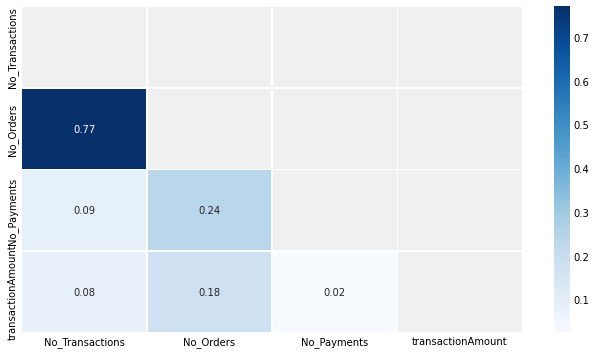

In [ ]:
# Correlation between the numerical features 
fig, ax = plt.subplots(figsize=(10,6))

mask = np.triu(np.ones_like(X_train.corr(), dtype=np.bool))
sns.heatmap(X_train.corr(), annot=True, cmap="Blues", mask=mask, linewidth=0.5, fmt=".2f")

In [ ]:
# Correlation in Categorical Features

categorical = [var for var in X_train.columns if X_train[var].dtype=='object']

def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

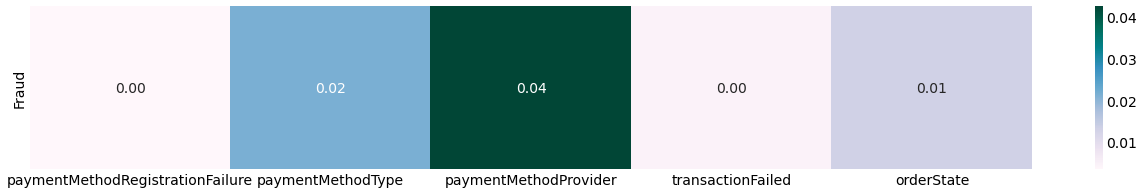

In [ ]:
theilu = pd.DataFrame(index=['Fraud'],columns=df[categorical].columns)
columns = df[categorical].columns
for j in range(0,len(columns)):
    u = theil_u(df['Fraud'].tolist(),df[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.rcParams['font.size'] = '14'
plt.figure(figsize=(20,3))
sns.heatmap(theilu,annot=True,fmt='.2f', cmap = 'PuBuGn')
plt.show()

In [ ]:
num_cols=X_train.select_dtypes(include=['int64','float64']).columns.tolist()

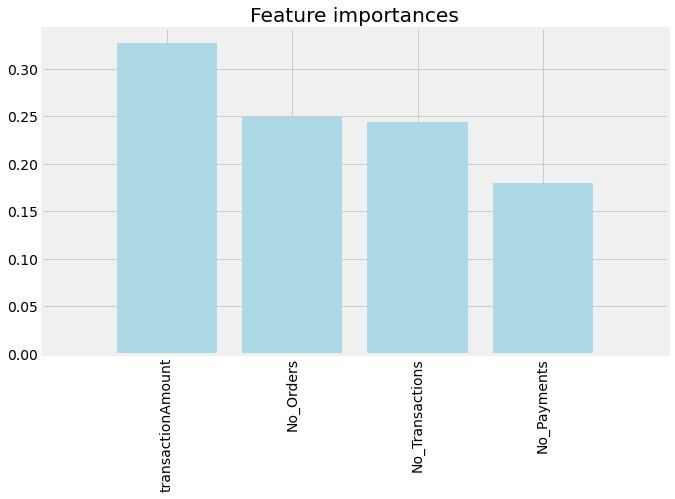

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier(n_estimators=400)
model.fit(X_train[num_cols], y_train)

# feature_importances_ from highest to lowest
sorted_idx = np.argsort(model.feature_importances_)
sorted_idx = sorted_idx[::-1]

# plot feature importances
plt.figure(figsize=(10,6))
plt.title("Feature importances")
plt.bar(range(X_train[num_cols].shape[1]), model.feature_importances_[sorted_idx],
        color="lightblue", align="center")
plt.xticks(range(X_train[num_cols].shape[1]), X_train[num_cols].columns[sorted_idx], rotation=90)
plt.xlim([-1, X_train[num_cols].shape[1]])
plt.show()

Feature paymentMethodRegistrationFailure : 3.88 
Feature paymentMethodType : 0.02 
Feature paymentMethodProvider : 21.30 
Feature transactionFailed : 3.22 
Feature orderState : 0.81 



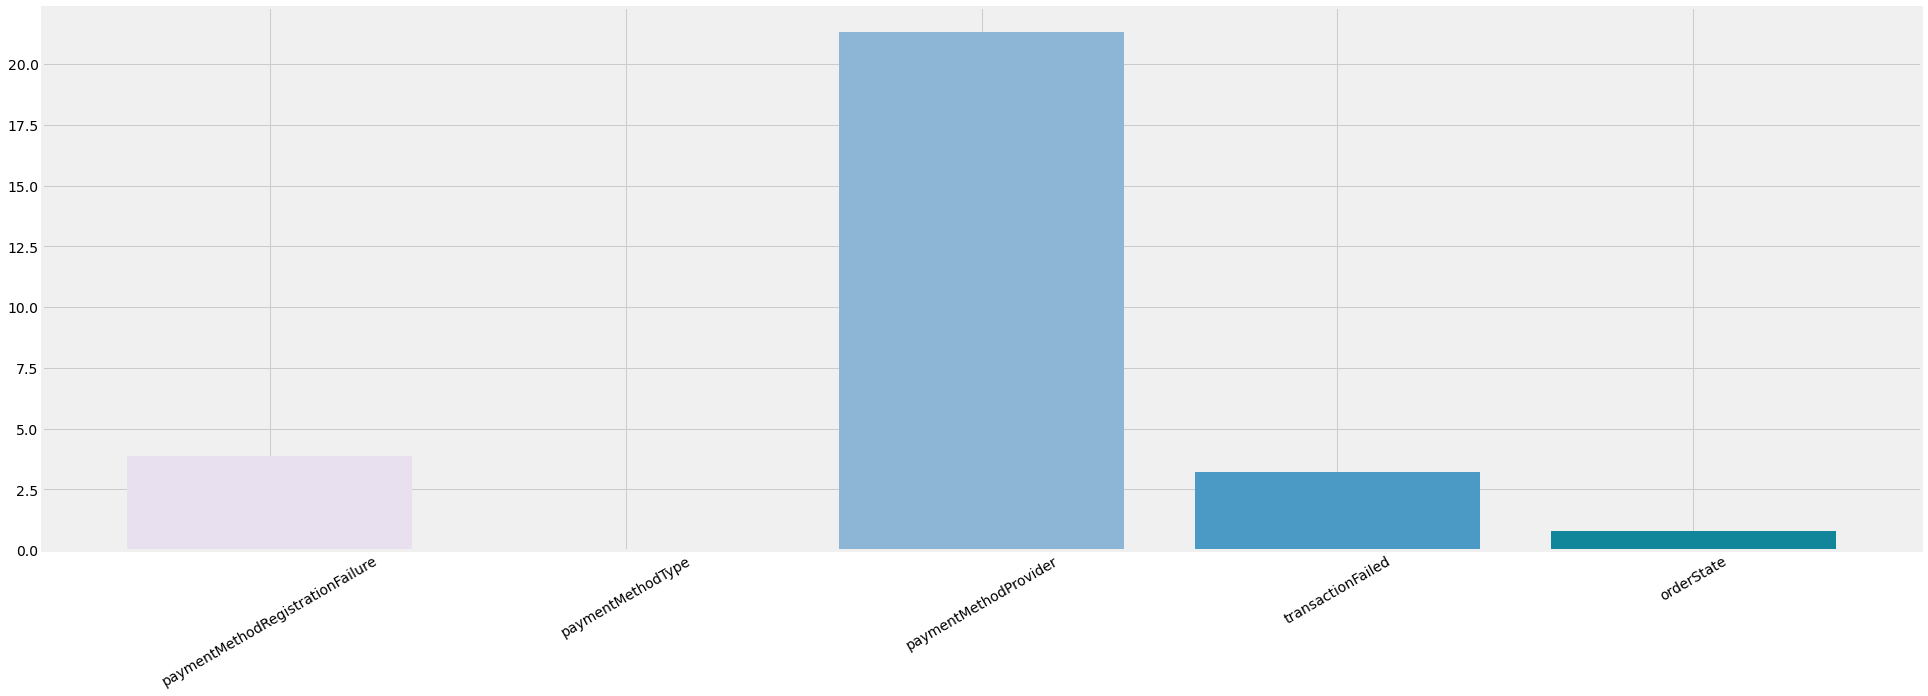

In [ ]:
#Define feature encoder 
le = LabelEncoder() #categorical encoder
feat_cat = pd.concat([X_train[categorical], y_train], axis=1) 
feat_cats= feat_cat.apply(le.fit_transform) #transform categorical to numeric

#Define Feature Selection with Chi-Square approach
fs_cat = SelectKBest(score_func=chi2, k='all')

#Apply categorical feature selection to Training Data
X_features_cat = fs_cat.fit_transform(feat_cats.drop("Fraud", axis=1), feat_cats['Fraud'])

# what are scores for the features
for col in list(feat_cats.drop("Fraud", axis=1).columns):
  score = fs_cat.scores_[feat_cats.drop("Fraud", axis=1).columns.get_loc(col)]
  print("Feature %s : %.2f " %(col , score))
print("")

#barplot
PALETTE = sns.color_palette("PuBuGn")
plt.figure(figsize=(30,10));
plt.bar([col for col in list(feat_cats.drop("Fraud", axis=1).columns)], fs_cat.scores_ , color=PALETTE);
plt.xticks(rotation=30);

In [ ]:
X_train = X_train.loc[:, ['transactionAmount', 'No_Transactions', 'No_Orders', 'No_Payments', 'paymentMethodRegistrationFailure', 'paymentMethodProvider', 'transactionFailed']]
X_test = X_test.loc[:, ['transactionAmount', 'No_Transactions', 'No_Orders', 'No_Payments', 'paymentMethodRegistrationFailure', 'paymentMethodProvider', 'transactionFailed']]

###4.4 FEATURE ENCODING

In [ ]:
X_train['paymentMethodProvider'] = X_train['paymentMethodProvider'].map({'American Express': 0, 'Discover': 1, 'Diners Club / Carte Blanche': 2, 'JCB 15 digit': 3, 'JCB 16 digit': 4, 'Maestro': 5, 'Mastercard': 6, 'VISA 13 digit': 7, 'VISA 16 digit': 8, 'Voyager': 9})
X_test['paymentMethodProvider'] = X_test['paymentMethodProvider'].map({'American Express': 0, 'Discover': 1, 'Diners Club / Carte Blanche': 2, 'JCB 15 digit': 3, 'JCB 16 digit': 4, 'Maestro': 5, 'Mastercard': 6, 'VISA 13 digit': 7, 'VISA 16 digit': 8, 'Voyager': 9})

In [ ]:
# check for missing values
X_test.isnull().sum()

transactionAmount                   0
No_Transactions                     0
No_Orders                           0
No_Payments                         0
paymentMethodRegistrationFailure    0
paymentMethodProvider               0
transactionFailed                   0
dtype: int64

#5. PIPELINE DAN HYPERPARAMETER TUNING

In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pipe_dt = Pipeline([
('scaler', StandardScaler()),
('classifier', DecisionTreeClassifier(random_state=28))])

pipe_rf = Pipeline([
('scaler', StandardScaler()),
('classifier', RandomForestClassifier(random_state=28))])

#Decision Tree
param_dt = {'scaler': [StandardScaler(),MinMaxScaler()],
            'classifier__criterion':['gini','entropy'],
            'classifier__max_depth':np.arange(2,8),
            'classifier__min_samples_split':np.arange(2,8),
            'classifier__min_samples_leaf':np.arange(2,8),
            'classifier__max_features':['auto','sqrt','log2']
            }

#Random Forest
param_rf = {'scaler': [StandardScaler(),MinMaxScaler()],
            'classifier__max_depth': [10, 50, 100],
            'classifier__max_features': [2, 3],
            'classifier__min_samples_leaf': [3, 4, 5],
            'classifier__min_samples_split': [8, 10, 12],
            'classifier__n_estimators': [100, 200, 300]
            }

#6. TRAIN MODEL NO TUNING AND TUNING WITH GRIDSEARCH

###6.1 DECISION TREE

####NOTUN

In [ ]:
pipe_dt.fit(X_train, y_train)
print('Training Score: ',round(pipe_dt.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_dt.score(X_test, y_test),4))

Training Score:  0.9985
Testing Score:  0.8232


In [ ]:
y_dt_pred = pipe_dt.predict(X_test)

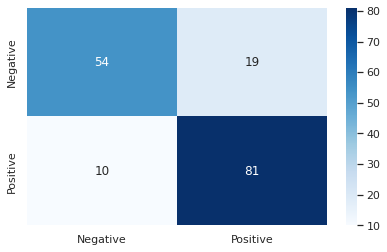

In [ ]:
cf_matrix_dt = confusion_matrix(y_test, y_dt_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax = sns.heatmap(cf_matrix_dt, annot = True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.show()

####TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_dt = GridSearchCV(pipe_dt, param_dt, cv=5).fit(X_train, y_train)

In [ ]:
print('Training set score: ' + str(grid_dt.score(X_train, y_train)))
print('Test set score: ' + str(grid_dt.score(X_test, y_test)))

Training set score: 0.7969465648854962
Test set score: 0.6707317073170732


In [ ]:
# Access the best set of parameters
best_params_dt = grid_dt.best_params_
print(best_params_dt)

# simpan optimum model
best_pipe_dt = grid_dt.best_estimator_
print(best_pipe_dt)
 
result_df_dt = pd.DataFrame.from_dict(grid_dt.cv_results_, orient='columns')
print(result_df_dt.columns)

{'classifier__criterion': 'entropy', 'classifier__max_depth': 7, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'scaler': StandardScaler()}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                        max_features='auto', min_samples_leaf=2,
                                        random_state=28))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__criterion', 'param_classifier__max_depth',
       'param_classifier__max_features', 'param_classifier__min_samples_leaf',
       'param_classifier__min_samples_split', 'param_scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


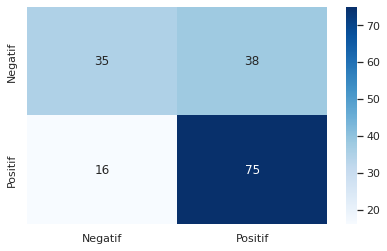

In [ ]:
cf_matrix_dt = confusion_matrix(y_test, best_pipe_dt.predict(X_test))

# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_dt, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

In [ ]:
print(classification_report(y_test, best_pipe_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.48      0.56        73
           1       0.66      0.82      0.74        91

    accuracy                           0.67       164
   macro avg       0.67      0.65      0.65       164
weighted avg       0.67      0.67      0.66       164



###6.2 RANDOM FOREST

####NOTUN

In [ ]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  0.9985
Testing Score:  0.8598


In [ ]:
y_rf_pred = pipe_rf.predict(X_test)

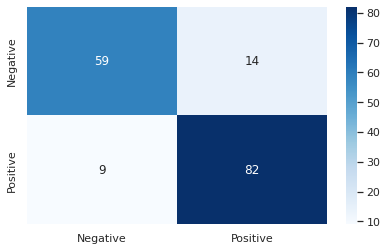

In [ ]:
cf_matrix_rf = confusion_matrix(y_test, y_rf_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax = sns.heatmap(cf_matrix_rf, annot = True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.show()

####TUNING

In [ ]:
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5).fit(X_train, y_train)

In [ ]:
print('Training set score: ' + str(grid_rf.score(X_train, y_train)))
print('Test set score: ' + str(grid_rf.score(X_test, y_test)))

Training set score: 0.934351145038168
Test set score: 0.8353658536585366


In [ ]:
# Access the best set of parameters
best_params_rf = grid_rf.best_params_
print(best_params_rf)

# simpan optimum model
best_pipe_rf = grid_rf.best_estimator_
print(best_pipe_rf)
 
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
print(result_df_rf.columns)

{'classifier__max_depth': 50, 'classifier__max_features': 3, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 8, 'classifier__n_estimators': 100, 'scaler': StandardScaler()}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=50, max_features=3,
                                        min_samples_leaf=3, min_samples_split=8,
                                        random_state=28))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__max_features',
       'param_classifier__min_samples_leaf',
       'param_classifier__min_samples_split', 'param_classifier__n_estimators',
       'param_scaler', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')


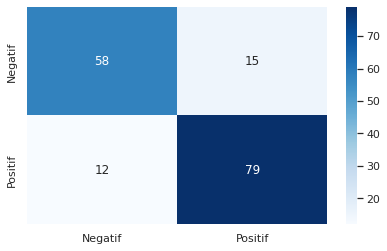

In [ ]:
# Cek confusion matrix
cf_matrix_rf = confusion_matrix(y_test, best_pipe_rf.predict(X_test))

# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_rf, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

In [ ]:
print(classification_report(y_test, best_pipe_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        73
           1       0.84      0.87      0.85        91

    accuracy                           0.84       164
   macro avg       0.83      0.83      0.83       164
weighted avg       0.84      0.84      0.83       164



#7. COMPARING MODELS

###7.1 BEFORE TUNING

In [ ]:
dt_notun = pipe_dt.score(X_test, y_test)
rf_notun = pipe_rf.score(X_test, y_test)

print(round(dt_notun,4))
print(round(rf_notun,4))

0.8232
0.8598


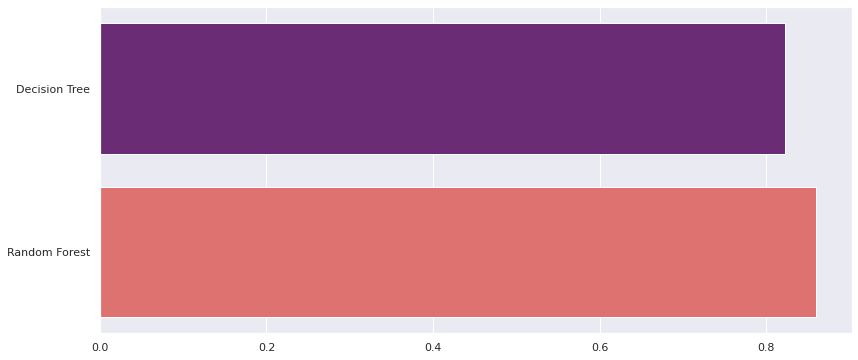

In [ ]:
plt.figure(figsize=(12,6))
model_acc_notun = [dt_notun, rf_notun]
model_name_notun = ['Decision Tree', 'Random Forest']
sns.barplot(x= model_acc_notun, y=model_name_notun, palette='magma')

In [ ]:
from sklearn.metrics import f1_score, recall_score

models_notun = {
    'dt_notun':pipe_dt,
    'rf_notun':pipe_rf
}
metrics = {
    'f1_score':f1_score,
    'recall':recall_score
}

fraud_model_notun = pd.DataFrame(columns=models_notun.keys(), index=['f1_score','recall'])

for metric in metrics.keys():
    for model in models_notun.keys():
        fraud_model_notun.loc[metric, model] = metrics[metric](y_test, models_notun[model].predict(X_test))

In [ ]:
fraud_model_notun

,dt_notun,rf_notun
f1_score,0.848168,0.877005
recall,0.89011,0.901099


###7.2 AFTER TUNING

In [ ]:
dt = grid_dt.score(X_test, y_test)
rf = grid_rf.score(X_test, y_test)

print(round(dt,4))
print(round(rf,4))

0.6707
0.8354


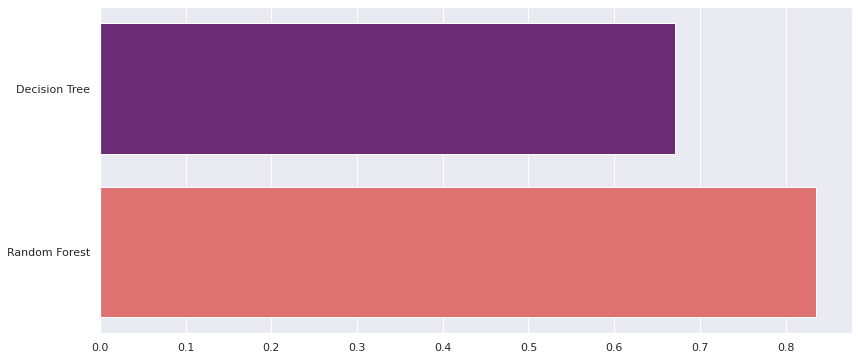

In [ ]:
plt.figure(figsize=(12,6))
model_acc = [dt, rf]
model_name = ['Decision Tree', 'Random Forest']
sns.barplot(x= model_acc, y=model_name, palette='magma')

In [ ]:
from sklearn.metrics import f1_score, recall_score

models = {
    'dt':best_pipe_dt,
    'rf':best_pipe_rf
}
metrics = {
    'f1_score':f1_score,
    'recall':recall_score
}

fraud_model = pd.DataFrame(columns=models.keys(), index=['f1_score','recall'])

for metric in metrics.keys():
    for model in models.keys():
        fraud_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [ ]:
fraud_model

,dt,rf
f1_score,0.735294,0.854054
recall,0.824176,0.868132


###7.3 COMPARE BEFORE AND AFTER TUNING

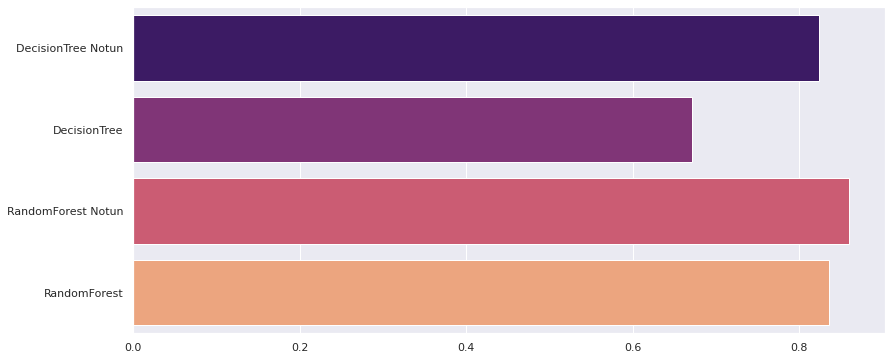

In [ ]:
plt.figure(figsize=(12,6))
model_acc_notun = [dt_notun, dt, rf_notun, rf]
model_name_notun = ['DecisionTree Notun', 'DecisionTree', 'RandomForest Notun', 'RandomForest']
sns.barplot(x= model_acc_notun, y=model_name_notun, palette='magma')

Best model for this case is random forest no tuning with better metric score

#8. SAVE MODEL

In [ ]:
import pickle

# Save model
pickle.dump(pipe_rf, open("rf_classifier.pickle", "wb"))

#9. LOAD MODEL

In [ ]:
rf_model = pickle.load(open('rf_classifier.pickle', 'rb'))

In [ ]:
new_data = {'transactionAmount' : 12, 'No_Transactions':8, 'No_Orders':6, 'No_Payments':12,
       'paymentMethodRegistrationFailure': 1, 'paymentMethodProvider': 9, 'transactionFailed': 1}

pred = pd.DataFrame(new_data, index = ['NewCustomer'])
pred

,transactionAmount,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,paymentMethodProvider,transactionFailed
NewCustomer,12,8,6,12,1,9,1


In [ ]:
rf_model.predict(pred)

array([1])

In [ ]:
new_data = {'transactionAmount' : 6, 'No_Transactions':3, 'No_Orders':2, 'No_Payments':2,
       'paymentMethodRegistrationFailure': 0, 'paymentMethodProvider': 0, 'transactionFailed': 0}

pred = pd.DataFrame(new_data, index = ['NewCustomer'])
pred

,transactionAmount,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,paymentMethodProvider,transactionFailed
NewCustomer,6,3,2,2,0,0,0


In [ ]:
rf_model.predict(pred)

array([0])